## Corpus

In [3]:
import util


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import wordcloud
import nltk
import spacy
import os
import string

In [5]:
df = pd.read_csv('../data/enc_tok_nostopword_nopunct_lemm.csv')
df.head()

,Unnamed: 0,req_text,age,age_encoded,word_tokens,lemma
0,0,quantos empregados em cada um dos atuais níve...,a2,1,"['quantos', 'empregados', 'cada', 'atuais', 'n...",quanto empregado cada atual nível salarial pca...
1,1,solicito cópia das atas do conselho de admini...,a2,1,"['solicito', 'cópia', 'atas', 'conselho', 'adm...",solicito cópia ata conselho administração bnde...
2,2,solicito informar a norma lei decreto portari...,a2,1,"['solicito', 'informar', 'norma', 'lei', 'decr...",solicito informar norma lei decreto portaria i...
3,3,solicito por gentileza a informação sobre a q...,a2,1,"['solicito', 'gentileza', 'informação', 'sobre...",solicito gentileza informação sobre quantidade...
4,4,solicito por gentileza a informação sobre a q...,a2,1,"['solicito', 'gentileza', 'informação', 'sobre...",solicito gentileza informação sobre quantidade...


In [6]:
df.describe()

,Unnamed: 0,age_encoded
count,8200.000000,8200.000000
mean,4099.500000,1.707317
std,2367.280437,0.993795
min,0.000000,0.000000
25%,2049.750000,1.000000
50%,4099.500000,2.000000
75%,6149.250000,2.000000
max,8199.000000,3.000000


In [7]:
df.groupby('age').describe()

Unnamed: 0                                                              \
         count         mean          std     min      25%     50%      75%   
age                                                                          
a1      1200.0  1951.893333  1022.986457    72.0  1126.50  2024.5  2807.25   
a2      2000.0  3021.780500  1723.322791     0.0  1550.75  3208.5  4463.25   
a3      3000.0  4203.378333  2406.518036    75.0  1975.50  4447.0  6336.75   
a4      2000.0  6309.966000  1365.141827  3075.0  5239.75  6586.5  7435.25   

            age_encoded                                     
        max       count mean  std  min  25%  50%  75%  max  
age                                                         
a1   3665.0      1200.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
a2   5802.0      2000.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  
a3   8065.0      3000.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0  
a4   8199.0      2000.0  3.0  0.0  3.0  3.0  3.0  3.0  3.0

### Observacao de alguns textos de cada classe

In [8]:
ages = sorted(df['age'].unique())
ages



['a1', 'a2', 'a3', 'a4']

In [18]:
pd.set_option('display.max_colwidth', None)

In [25]:
for classe in ages:
    temp = df[df['age'] == classe].sample(2)
    print(f"\nSelecao aleatoria de {classe}\n" )
    print(temp['req_text']) 


Selecao aleatoria de a1

3374                           boa tarde estou realizando um trabalho acadêmico para a universidade paulista em são paulo e preciso dos dados demográficos população local habitanteskm² etc do bairro vila gumercindo localizado na cidade de são paulosp pelo que pude constatar esse bairro é abrangido pela região cursino e ipiranga
1747    boa noite gostaria de saber quantos códigos de vaga disponíveis existem para o cargo de técnico em tecnologia da informação no instituto federal de educação ciência e tecnologia do rio grande do norte ifrn a informação solicitada se faz necessária para iniciar as comunicações com a instituição e solicitar redistribuição
Name: req_text, dtype: object

Selecao aleatoria de a2

4561                           boa tarde gostaria da informação sobre equipamentos de saúde preparados e que são referência no tratamento da lúpus eritematoso sistêmico  les nos municípios do estado de são paulo para embasarme num artigo de pós graduação agr

## Analise do texto

In [9]:
for cl in ages:
    CltGroup = util.preprocess(df.loc[df['age'] == cl]['lemma'])
    aux = util.create_freq_df(CltGroup)
    TopWords = aux[:20]

    util.plot_text_distribution(TopWords['Term'], TopWords['Frequency'],
                    'reds', 'Top 10 Palavras recorrentes ' + cl, 'Text', 'Number of Texts')

In [10]:
df_analysis = df[['lemma', 'age']]
df_analysis

,lemma,age
0,quanto empregado cada atual nível salarial pca...,a2
1,solicito cópia ata conselho administração bnde...,a2
2,solicito informar norma lei decreto portaria i...,a2
3,solicito gentileza informação sobre quantidade...,a2
4,solicito gentileza informação sobre quantidade...,a2
...,...,...
8195,desejo saber nome constar relação restituição ...,a4
8196,desejo saber poder utilizar nome fantasia sant...,a4
8197,desejo saber quanta vaga desocupar ufrb cargo ...,a4
8198,desejo saber algum pendência receitar federal ...,a4


In [11]:
from nltk import tokenize

In [12]:
df_analysis['Length corpus'] = df_analysis['lemma'].str.len()
df_analysis['word_count'] = df_analysis['lemma'].apply(lambda x: len(x.split()))
df_analysis['mean_word_length'] = df_analysis['lemma'].map(lambda rev: np.mean([len(word) for word in rev.split()]))
df_analysis['mean_sent_length'] = df_analysis['lemma'].map(lambda rev: np.mean([len(sent) for sent in tokenize.sent_tokenize(rev)]))

/tmp/ipykernel_4272/3981227675.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_4272/3981227675.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_4272/3981227675.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [13]:
df_analysis

,lemma,age,Length corpus,word_count,mean_word_length,mean_sent_length
0,quanto empregado cada atual nível salarial pca...,a2,174,27,5.481481,174.0
1,solicito cópia ata conselho administração bnde...,a2,173,23,6.565217,173.0
2,solicito informar norma lei decreto portaria i...,a2,187,26,6.230769,187.0
3,solicito gentileza informação sobre quantidade...,a2,180,24,6.541667,180.0
4,solicito gentileza informação sobre quantidade...,a2,181,24,6.583333,181.0
...,...,...,...,...,...,...
8195,desejo saber nome constar relação restituição ...,a4,70,10,6.100000,70.0
8196,desejo saber poder utilizar nome fantasia sant...,a4,117,16,6.375000,117.0
8197,desejo saber quanta vaga desocupar ufrb cargo ...,a4,85,12,6.166667,85.0
8198,desejo saber algum pendência receitar federal ...,a4,174,27,5.481481,174.0


In [ ]:
df_analysis.groupby('age').mean()

In [14]:
def visualize(col):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.boxplot(x='age', y=col, data=df_analysis)
    plt.ylabel(col, labelpad=12.5)

    plt.subplot(1, 2, 2)
    for age_group in df_analysis['age'].unique():
        sns.kdeplot(df_analysis[df_analysis['age'] == age_group][col], label=str(age_group))
    
    plt.xlabel('')
    plt.ylabel('')
    plt.legend(title='Age')
    
    plt.show()


/home/chocomenta/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/chocomenta/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/chocomenta/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/chocomenta/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/chocomenta/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as

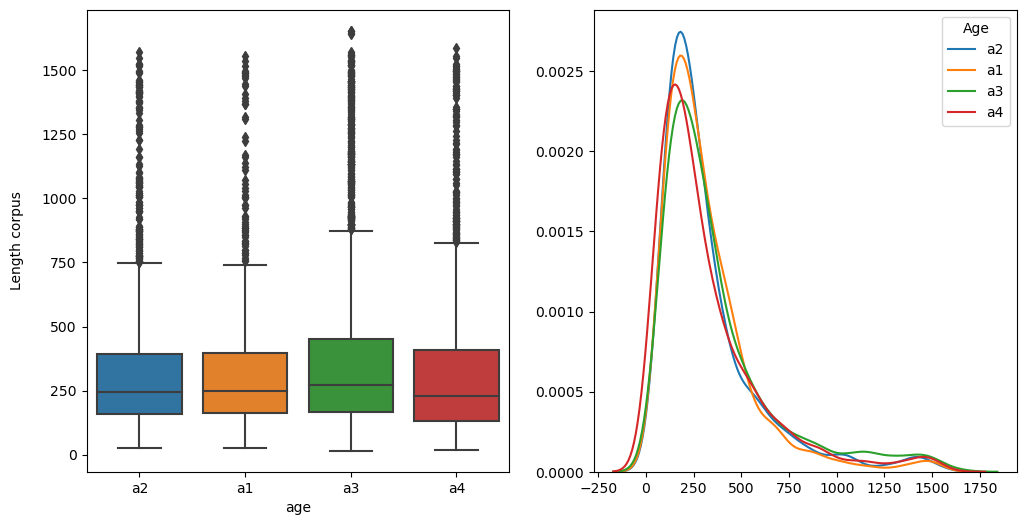

/home/chocomenta/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/chocomenta/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/chocomenta/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/chocomenta/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/chocomenta/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as

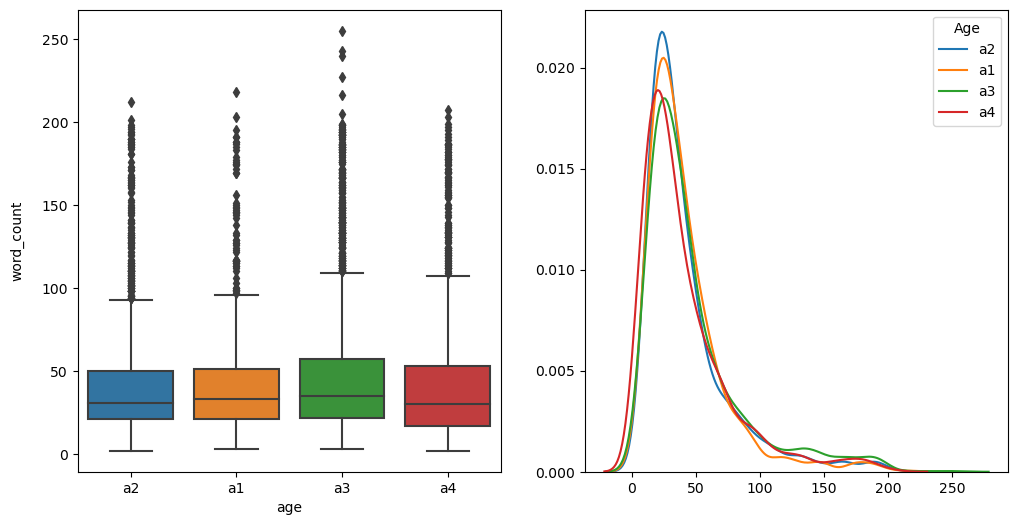

/home/chocomenta/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/chocomenta/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/chocomenta/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/chocomenta/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/chocomenta/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as

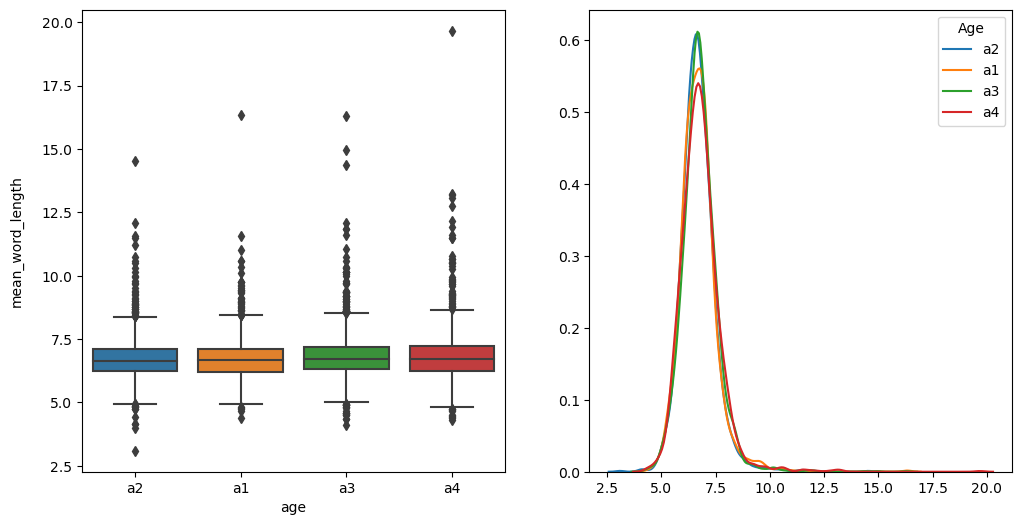

/home/chocomenta/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/chocomenta/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/chocomenta/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/chocomenta/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/chocomenta/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as

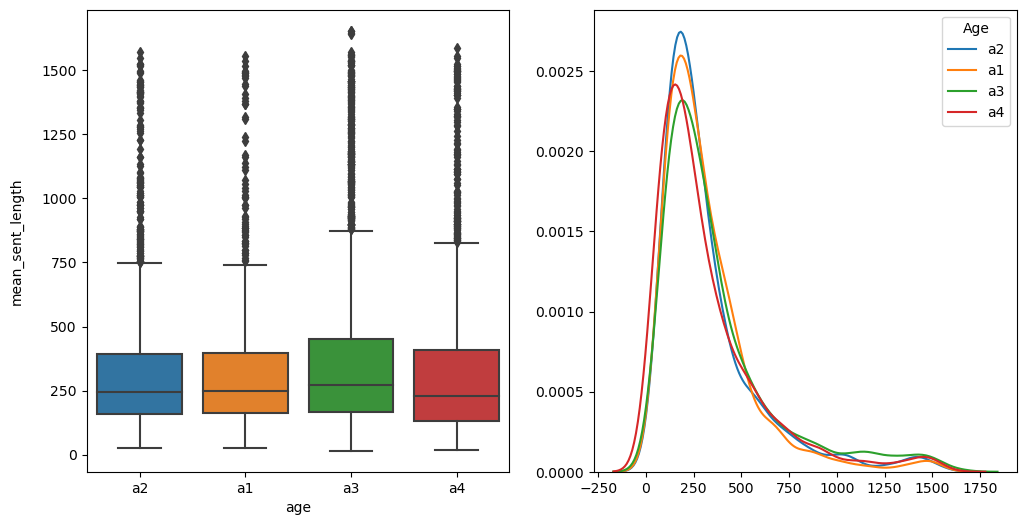

In [15]:
for col in range(2, df_analysis.shape[1]):
    feature = df_analysis.columns[col]
    visualize(feature)